In [7]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class  
import math

In [8]:
n_power_1 = 0
dm_mass_1 =  0 #GeV
sigma_dmb_1 = 0 
l_2 = 5000

n_power_2 = 2
dm_mass_2 =  100 #GeV
sigma_dmb_2 = 2.6912304962132555e-18 #SO
l_1 = 5000

In [9]:
params_1 = {'output': 'tCl pCl lCl','l_max_scalars': l_1,'lensing': 'yes',
                    'omega_dmb': 0.12,
                    'h': 0.6730804,
                    'omega_b': 0.0224,
                    'A_s': 2.2e-9,
                    'n_s': 0.96,
                    'tau_reio': 0.07,
                    'omega_cdm' :1e-22,
                    'm_dmb': dm_mass_1,'n_dmb': n_power_1,'sigma_dmb': sigma_dmb_1,
                    'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611,
                    'reionization_optical_depth_tol': 1e-07,
                    'perturb_sampling_stepsize':0.01,
                    'k_max_tau0_over_l_max' : 6,'gauge' : 'synchronous'}
    
params_2 = {'output': 'tCl pCl lCl','l_max_scalars': l_2,'lensing': 'yes',
                    'omega_dmb': 0.12,
                    'h': 0.6730804,
                    'omega_b': 0.0224,
                    'A_s': 2.2e-9,
                    'n_s': 0.96,
                    'tau_reio': 0.07,
                    'omega_cdm' :1e-22,
                    'm_dmb': dm_mass_2,'n_dmb': n_power_2,'sigma_dmb': sigma_dmb_2,
                    'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611,
                    'reionization_optical_depth_tol': 1e-07,
                     'perturb_sampling_stepsize':0.01,
                     'k_max_tau0_over_l_max' : 6,'gauge' : 'synchronous'}
M1 = Class()
M1.set(params_1)
M1.compute()
cl_tot_1 = M1.lensed_cl(l_1)
M1.struct_cleanup()
M1.empty()
cl_TT_1 = cl_tot_1['tt']
ell_1 = cl_tot_1['ell']

M2 = Class()
M2.set(params_2)
M2.compute()
cl_tot_2 = M2.lensed_cl(l_2)
M2.struct_cleanup()
M2.empty()
cl_TT_2 = cl_tot_2['tt']
ell_2 = cl_tot_2['ell']

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


<ipython-input-23-600122002074>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot( 100*(cl_TT_1 - cl_TT_2) /cl_TT_1)


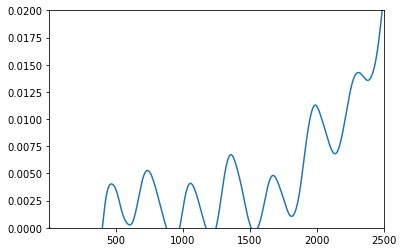

In [23]:
#fig, ax = plt.subplots(figsize=(11, 6))
plt.plot( 100*(cl_TT_1 - cl_TT_2) /cl_TT_1)


#plt.ylabel(r'$(\partial C_{\ell}^{TT} / \partial \sigma_{dmeff}) / C_{\ell}^{TT}$',size=20)
#plt.xlabel(r'$\ell$',size=20)
#plt.legend(loc='upper left', frameon=False)
plt.xlim([2, 2500])
plt.ylim(0,0.02)

plt.show()
#fig.savefig("derivative_vs_stepsize_1Gev_n=4.png") 